In [1]:
from alpha_vantage.timeseries import TimeSeries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [3]:
import requests
import alpha_vantage
import json

API_URL = "https://www.alphavantage.co/query" 
symbols = ['QCOM',"INTC","PDD"]
data =[]
for symbol in symbols:
        data = { "function": "TIME_SERIES_INTRADAY", 
        "symbol": symbol,
        "interval" : "1min",
        "outputsize" : "full",
        "datatype": "json", 
        "apikey": "XXX" } 
        response = requests.get(API_URL, data) 
        data = response.json()
#         print(data)
        a = (data['Time Series (1min)'])
#         print(a)
        keys = (a.keys())
#         for key in keys:
#                 print(a[key]['2. high'] + " " + a[key]['5. volume'])

In [4]:
# import requests
# import pandas as pd

# API_URL = "https://www.alphavantage.co/documentation" 
# symbol = 'SMBL'

# data1 = { "function": "TIME_SERIES_DAILY", 
# "symbol": symbol,
# "outputsize" : "full",
# "datatype": "json", 
# "apikey": "XXX" } 

# response = requests.get(API_URL, data1) 
# response_json = response.json() # maybe redundant
# print(response_json)
# data1 = pd.DataFrame.from_dict(response_json['Time Series (Daily)'], orient= 'index').sort_index(axis=1)
# data1 = data1.rename(columns={ '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. adjusted close': 'AdjClose', '6. volume': 'Volume'})
# data1 = data1[[ 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']]
# data1tail() # check OK or not

In [5]:
# df = pd.DataFrame({'open': float, 'high': float, 'low': float, 'close':float, 'volume':float, 'timestamp':str})
df = pd.DataFrame(data, columns = ['open', 'high','low', 'close', 'volume','timestamp']) 


In [6]:
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)
df['timestamp'] = df['timestamp'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
open         0 non-null float64
high         0 non-null float64
low          0 non-null float64
close        0 non-null float64
volume       0 non-null float64
timestamp    0 non-null object
dtypes: float64(5), object(1)
memory usage: 0.0+ bytes


In [8]:
open_list = []
high_list = []
low_list = []
close_list = []
volume_list = []
timestamp_list = []


In [10]:
a = (data['Time Series (1min)'])
# print(a)
keys = (a.keys())
for key in keys:
    open_list.append(a[key]['1. open'])
    high_list.append(a[key]['2. high'])
    low_list.append(a[key]['3. low'])
    close_list.append(a[key]['4. close']) 
    volume_list.append(a[key]['5. volume'])
    timestamp_list.append(key)
#     print(open_list)

In [11]:
df['open'] = open_list
df['high'] = high_list
df['low'] = low_list
df['close'] = close_list
df['volume'] = volume_list
df['timestamp'] = timestamp_list

In [12]:
df.head(5)

,open,high,low,close,volume,timestamp
0,36.8000,36.8300,36.8000,36.8100,96086,2020-02-12 16:00:00
1,36.8000,36.8100,36.7950,36.8050,90411,2020-02-12 15:59:00
2,36.8050,36.8100,36.7950,36.8000,70198,2020-02-12 15:58:00
3,36.8050,36.8100,36.8000,36.8100,38307,2020-02-12 15:57:00
4,36.8200,36.8300,36.7900,36.8001,34950,2020-02-12 15:56:00


 ## LSTM - Long Short Term Memory

Recurrent netwoek has some disadvantages over LSTM .

short-term memory : Recurrent Neural Networks suffer from short-term memory. If a sequence is long enough, they’ll have a hard time carrying information from earlier time steps to later ones. So if you are trying to process a paragraph of text to do predictions, RNN’s may leave out important information from the beginning.

vanishing gradient problem : During back propagation, recurrent neural networks suffer from the vanishing gradient problem. Gradients are values used to update a neural networks weights. The vanishing gradient problem is when the gradient shrinks as it back propagates through time. If a gradient value becomes extremely small, it doesn’t contribute too much learning. 

used in Google Assistance , alexa 

In [13]:
df.shape

(1944, 6)

In [14]:
df_train = df.iloc[0:1900, :]
df_test = df.iloc[1900:1944, :]

In [15]:
training_set = df_train.iloc[:, 1:2].values 

In [16]:
# feature Scalling 

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
x_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(1840, 60)

In [19]:
y_train.shape

(1840,)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


Using TensorFlow backend.


In [21]:
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
model = Sequential()
model.add(LSTM(units=60,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
1840/1840 [==============================] - 44s 24ms/step - loss: 0.0273
Epoch 2/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0063
Epoch 3/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0058
Epoch 4/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0055
Epoch 5/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0052
Epoch 6/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0050
Epoch 7/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0047
Epoch 8/100
1840/1840 [==============================] - 39s 21ms/step - loss: 0.0048
Epoch 9/100
1840/1840 [==============================] - 37s 20ms/step - loss: 0.0045
Epoch 10/100
1840/1840 [==============================] - 37s 20ms/step - loss: 0.0042
Epoch 11/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0039
Epoch 12/100
1840/1840 [===========================

1840/1840 [==============================] - 38s 21ms/step - loss: 0.0013
Epoch 93/100
1840/1840 [==============================] - 39s 21ms/step - loss: 0.0011
Epoch 94/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0012
Epoch 95/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0013
Epoch 96/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0012
Epoch 97/100
1840/1840 [==============================] - 39s 21ms/step - loss: 0.0010
Epoch 98/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0013
Epoch 99/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0012
Epoch 100/100
1840/1840 [==============================] - 38s 21ms/step - loss: 0.0013


In [23]:
testing_set = df_test.iloc[:, 1:2]

In [24]:
dataset_total = pd.concat((df_train['open'], df_test['open']), axis =0 )
inputs = dataset_total[len(dataset_total)- len(df_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test=[]
for i in range(60, 104):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

 Here train data size is : 1900
 test data size is : 44
 loss : 0.0010
 column size : 60

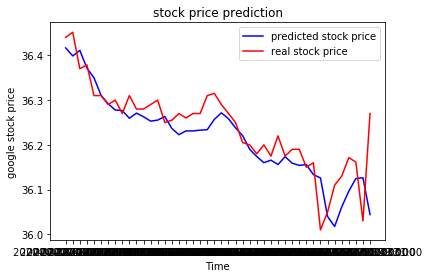

In [25]:
plt.plot(df_test['timestamp'],predicted_stock_price, color='blue', label ='predicted stock price')
plt.plot(df_test['timestamp'],df_test['open'].astype('float32'), color='red', label='real stock price ')

plt.title('stock price prediction' )
plt.xlabel('Time')

plt.ylabel('google stock price')
plt.legend()
plt.show()